# Laser Wakefield Accelerator

2D simulation of a laser wakefield accelerator.

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em2d as zpic
import numpy as np


dt = 0.014
tmax = 22.0

#Simulation box
nx  = [ 1000, 128 ]
box = [ 20.0, 25.6 ]

# Particles per cell
ppc = [2,2]

electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = zpic.Density( type = "step", start = 20.0))

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = electrons )

# Add laser pulse
sim.add_laser( zpic.Laser( type = "gaussian", start = 17.0, fwhm = 2.0, a0 = 1.0, omega0 = 10.0, 
                           W0 = 4.0, focus = 20.0, axis = 12.8, polarization = np.pi/2 ))


# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( zpic.Smooth(xtype = "compensated", xlevel = 4) )

# Run the simulation
sim.run( tmax )



Running simulation up to t = 22 ...
n = 1572, t = 22.008
Done.


## Laser Field

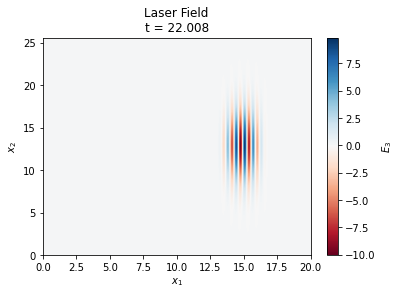

In [2]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( sim.emf.Ez, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {:g}".format(sim.t))

plt.show()

## Accelerating Field

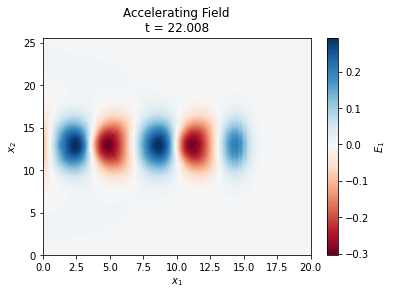

In [3]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( sim.emf.Ex, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_1$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Accelerating Field\nt = {:g}".format(sim.t))

plt.show()

## Background Plasma Density

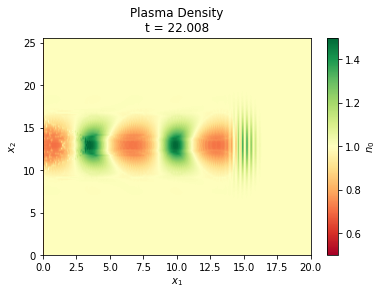

In [4]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( np.abs(electrons.charge()), interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'RdYlGn', vmin = 0.5, vmax = 1.5)

plt.colorbar().set_label('$n_0$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Plasma Density\nt = {:g}".format(sim.t))

plt.show()

## x1 - u1 Phasespace density

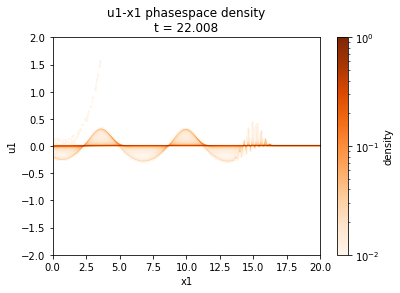

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

nx    = [1024,512]
range = [[0,sim.box[0]],[-2.,2.]]

pha = np.abs(electrons.phasespace( ['x1','u1'], nx, range ))
pha /= np.max(pha)

plt.imshow( pha, origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Oranges', norm=LogNorm(vmin = 0.01))

plt.colorbar().set_label('density')
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace density\nt = {:g}".format(sim.t))

plt.show()